# Data Science Project: Bank Marketing (Campaign)
## Data Cleansing and Transformation


### Problem description:
ABC Bank wants to sell its term deposit product to customers and before launching the product they want to develop a model which help them in understanding whether a particular customer will buy their product or not (based on customer's past interaction with bank or other Financial Institution).


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv(r"C:\Users\dorti\Documents\DataGlacier\Week9\bank-additional-full.csv", sep=";")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [33]:
print(df.duplicated().sum())

12


### There are 12 duplicate observation, so we proceed to drop the duplicate values.

In [34]:
df = df.drop_duplicates()

In [35]:
cat_features = []
num_features = []

for i in df.columns:
    if df[i].dtype == "object":
        cat_features.append(i)    

cat_features.remove("y")

for i in df.columns:
    if df[i].dtype != "object":
        num_features.append(i)

### Looking for unique values in the categorical features

In [36]:
for i in cat_features:
    print(f"{i}: {df[i].unique()}\n")

job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

marital: ['married' 'single' 'divorced' 'unknown']

education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

default: ['no' 'unknown' 'yes']

housing: ['no' 'yes' 'unknown']

loan: ['no' 'yes' 'unknown']

contact: ['telephone' 'cellular']

month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']

poutcome: ['nonexistent' 'failure' 'success']



### Looking for outliers in the numerical columns of the dataset:

In [37]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


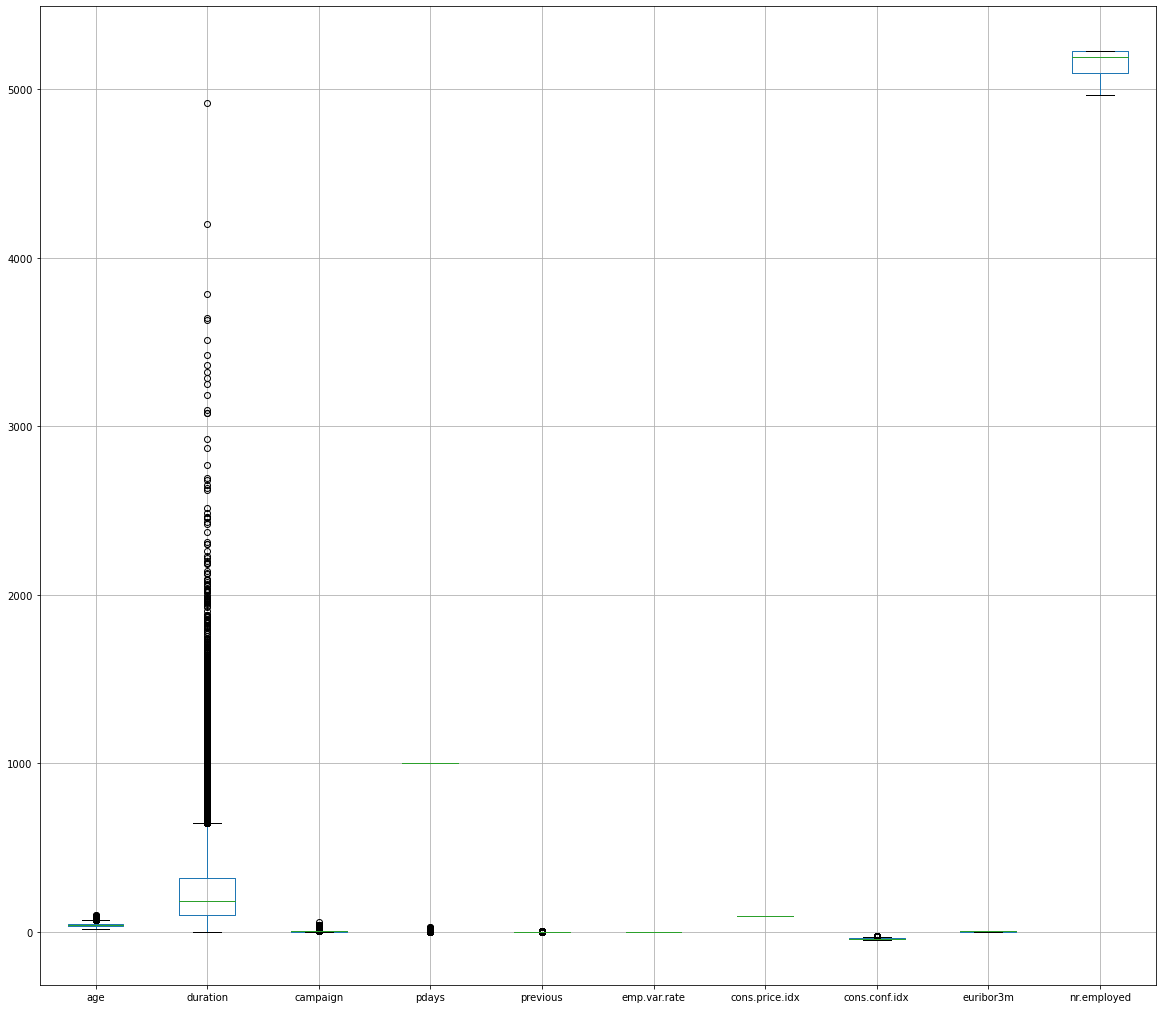

In [38]:
df.boxplot(figsize=(20,18))
plt.show()

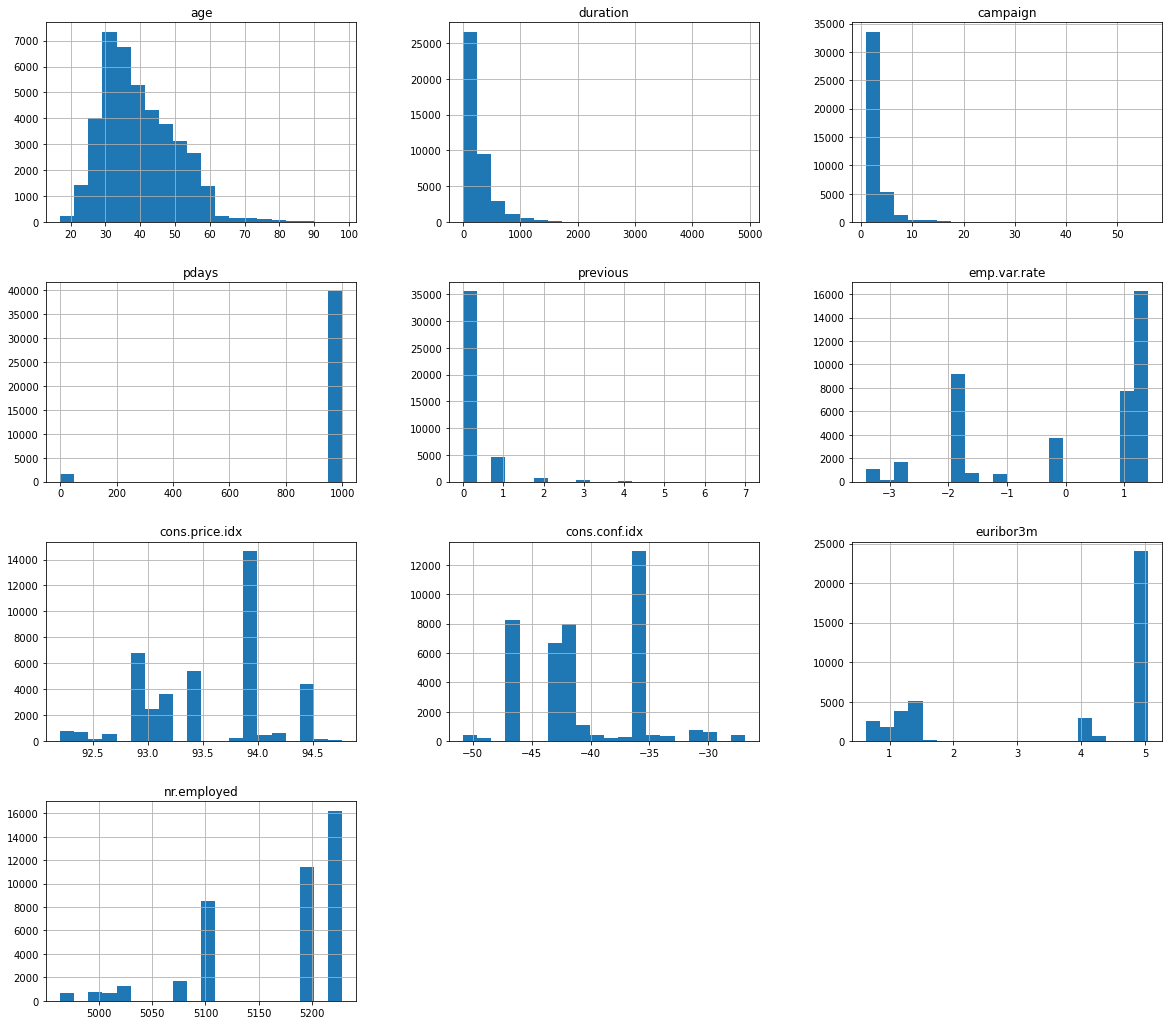

In [39]:
df.hist(bins=20,figsize=(20,18))
plt.show()

In [40]:
def max_threshold(arr):
    iqr = np.percentile(arr,75) - np.percentile(arr,25)
    upper_limit = np.percentile(arr,75) + 1.5*iqr
    
    return upper_limit

def min_threshold(arr):
    iqr = np.percentile(arr,75) - np.percentile(arr,25)
    lower_limit = np.percentile(arr,25) - 1.5*iqr
    
    return lower_limit

In [41]:
def find_outlier(df):
    for i in df.columns:
        df_filtered = df
        iqr = np.percentile(df[i],75) - np.percentile(df[i],25)
        upper_limit = max_threshold(df[i])
        lower_limit = min_threshold(df[i])
        
        df_filtered = df[(df[i] > upper_limit) | (df[i] < lower_limit)]

        outliers,_ = df_filtered.shape
        
        print(f"{i}: {outliers}")

In [42]:
find_outlier(df[num_features])

age: 468
duration: 2963
campaign: 2406
pdays: 1515
previous: 5625
emp.var.rate: 0
cons.price.idx: 0
cons.conf.idx: 446
euribor3m: 0
nr.employed: 0


Looking at the distributions of this data, we can conclude that the "duration" and "pdays" columns need to be addressed.
The "duration" column will be removed and the "pdays" column will be changed from 999 to 0.

In [43]:
df = df.drop("duration", axis=1)

In [44]:
df["pdays"].replace(999,0, inplace = True)

In [46]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,2.567879,0.221294,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,2.770318,1.349065,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,0.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,27.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000
